In [3]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, Sentence, FlairEmbeddings, BertEmbeddings
from typing import List
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer
from flair.visual.training_curves import Plotter

In [4]:
# 1. get the corpus

# define columns
columns = {0: 'text', 1: 'key_phrase', 2: 'kp_type'}

# this is the folder in which train, test and dev files reside
data_folder = 'corpus_data/'

# init a corpus using column format, data folder and the names of the train, dev and test files
corpus: Corpus = ColumnCorpus(data_folder, columns)

2020-05-13 11:04:35,058 Reading data from corpus_data
2020-05-13 11:04:35,059 Train: corpus_data/train.txt
2020-05-13 11:04:35,060 Dev: corpus_data/dev.txt
2020-05-13 11:04:35,061 Test: corpus_data/test.txt


In [5]:
print(len(corpus.train))
print(len(corpus.dev))
print(len(corpus.test))

1386
367
748


In [32]:
corpus.test[0].to_tagged_string('key_phrase')

'This research traces the implementation of an information system in the form of ERP <B> modules <I> covering tenant and contract management in a Chinese service company.'

In [16]:
# 2. what tag do we want to predict?
tag_type = 'key_phrase'

In [17]:
# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary)

Dictionary with 6 tags: <unk>, O, B, I, <START>, <STOP>


In [18]:
# 4. initialize embeddings
embedding_types: List[TokenEmbeddings] = [

    BertEmbeddings()
    
    #WordEmbeddings('glove'),

    # comment in this line to use character embeddings
    # CharacterEmbeddings(),

    # comment in these lines to use flair embeddings
    #FlairEmbeddings('news-forward'),
    #FlairEmbeddings('news-backward'),
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

In [26]:
# 5. initialize sequence tagger
tagger: SequenceTagger = SequenceTagger(hidden_size=512,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True,
                                        dropout=0.1)

In [27]:
# 6. initialize trainer
trainer: ModelTrainer = ModelTrainer(tagger, corpus)

In [28]:
# 7. start training
trainer.train('resources/taggers/key_phrase_bert',
              learning_rate=0.34, # 0.17 for glove/flair
              mini_batch_size=16,
              max_epochs=40,
              embeddings_storage_mode='gpu'
              )

2020-04-29 18:24:00,304 ----------------------------------------------------------------------------------------------------
2020-04-29 18:24:00,307 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): BertEmbeddings(
      (model): BertModel(
        (embeddings): BertEmbeddings(
          (word_embeddings): Embedding(30522, 768, padding_idx=0)
          (position_embeddings): Embedding(512, 768)
          (token_type_embeddings): Embedding(2, 768)
          (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (encoder): BertEncoder(
          (layer): ModuleList(
            (0): BertLayer(
              (attention): BertAttention(
                (self): BertSelfAttention(
                  (query): Linear(in_features=768, out_features=768, bias=True)
                  (key): Linear(in_features=768, out_features=768, bias=True)
                  (value): Linear(in_feature

2020-04-29 18:24:00,308 ----------------------------------------------------------------------------------------------------
2020-04-29 18:24:00,310 Corpus: "Corpus: 1386 train + 367 dev + 748 test sentences"
2020-04-29 18:24:00,311 ----------------------------------------------------------------------------------------------------
2020-04-29 18:24:00,311 Parameters:
2020-04-29 18:24:00,312  - learning_rate: "0.34"
2020-04-29 18:24:00,313  - mini_batch_size: "16"
2020-04-29 18:24:00,314  - patience: "3"
2020-04-29 18:24:00,315  - anneal_factor: "0.5"
2020-04-29 18:24:00,316  - max_epochs: "40"
2020-04-29 18:24:00,317  - shuffle: "True"
2020-04-29 18:24:00,318  - train_with_dev: "False"
2020-04-29 18:24:00,319  - batch_growth_annealing: "False"
2020-04-29 18:24:00,320 ----------------------------------------------------------------------------------------------------
2020-04-29 18:24:00,324 Model training base path: "resources/taggers/key_phrase_bert"
2020-04-29 18:24:00,328 -----------

/Users/hn19405/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type StackedEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/hn19405/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BertEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/hn19405/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BertModel. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/hn19405/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Embedding. It won't be checked for correctness u

2020-04-29 18:25:34,126 ----------------------------------------------------------------------------------------------------
2020-04-29 18:25:42,293 epoch 2 - iter 8/87 - loss 18.50707972 - samples/sec: 15.68
2020-04-29 18:25:49,959 epoch 2 - iter 16/87 - loss 18.46897978 - samples/sec: 17.16
2020-04-29 18:25:58,242 epoch 2 - iter 24/87 - loss 17.65337118 - samples/sec: 15.84
2020-04-29 18:26:06,372 epoch 2 - iter 32/87 - loss 17.50746718 - samples/sec: 16.14
2020-04-29 18:26:14,590 epoch 2 - iter 40/87 - loss 17.24344602 - samples/sec: 15.98
2020-04-29 18:26:22,790 epoch 2 - iter 48/87 - loss 17.20981089 - samples/sec: 16.00
2020-04-29 18:26:31,872 epoch 2 - iter 56/87 - loss 17.00325838 - samples/sec: 14.42
2020-04-29 18:26:41,248 epoch 2 - iter 64/87 - loss 17.34243621 - samples/sec: 13.98
2020-04-29 18:26:49,743 epoch 2 - iter 72/87 - loss 17.30776827 - samples/sec: 15.43
2020-04-29 18:26:57,600 epoch 2 - iter 80/87 - loss 17.45555297 - samples/sec: 16.73
2020-04-29 18:27:04,897 --

2020-04-29 18:37:21,806 epoch 8 - iter 48/87 - loss 13.88951272 - samples/sec: 10.74
2020-04-29 18:37:32,891 epoch 8 - iter 56/87 - loss 14.11884563 - samples/sec: 11.78
2020-04-29 18:37:44,355 epoch 8 - iter 64/87 - loss 13.87969109 - samples/sec: 11.38
2020-04-29 18:37:55,419 epoch 8 - iter 72/87 - loss 13.93919292 - samples/sec: 11.79
2020-04-29 18:38:06,993 epoch 8 - iter 80/87 - loss 13.95414567 - samples/sec: 11.27
2020-04-29 18:38:17,965 ----------------------------------------------------------------------------------------------------
2020-04-29 18:38:17,967 EPOCH 8 done: loss 13.7298 - lr 0.3400
2020-04-29 18:38:23,051 DEV : loss 9.017121315002441 - score 0.6373
2020-04-29 18:38:23,055 BAD EPOCHS (no improvement): 0
2020-04-29 18:38:23,438 ----------------------------------------------------------------------------------------------------
2020-04-29 18:38:35,725 epoch 9 - iter 8/87 - loss 13.58948159 - samples/sec: 10.42
2020-04-29 18:38:47,172 epoch 9 - iter 16/87 - loss 13.

2020-04-29 18:52:45,362 ----------------------------------------------------------------------------------------------------
2020-04-29 18:52:45,363 EPOCH 14 done: loss 9.1010 - lr 0.1700
2020-04-29 18:52:51,867 DEV : loss 7.21267557144165 - score 0.451
2020-04-29 18:52:51,871 BAD EPOCHS (no improvement): 2
2020-04-29 18:52:51,873 ----------------------------------------------------------------------------------------------------
2020-04-29 18:53:06,143 epoch 15 - iter 8/87 - loss 9.10777813 - samples/sec: 8.97
2020-04-29 18:53:19,485 epoch 15 - iter 16/87 - loss 9.23439786 - samples/sec: 9.76
2020-04-29 18:53:33,289 epoch 15 - iter 24/87 - loss 8.99919762 - samples/sec: 9.41
2020-04-29 18:53:47,603 epoch 15 - iter 32/87 - loss 8.85551405 - samples/sec: 9.09
2020-04-29 18:54:00,008 epoch 15 - iter 40/87 - loss 8.65281875 - samples/sec: 10.49
2020-04-29 18:54:13,204 epoch 15 - iter 48/87 - loss 8.62342402 - samples/sec: 9.86
2020-04-29 18:54:26,986 epoch 15 - iter 56/87 - loss 8.8234507

2020-04-29 19:07:12,730 epoch 21 - iter 16/87 - loss 8.03076553 - samples/sec: 10.83
2020-04-29 19:07:25,878 epoch 21 - iter 24/87 - loss 7.73410279 - samples/sec: 9.89
2020-04-29 19:07:37,161 epoch 21 - iter 32/87 - loss 7.55115046 - samples/sec: 11.56
2020-04-29 19:07:49,837 epoch 21 - iter 40/87 - loss 7.66531870 - samples/sec: 10.26
2020-04-29 19:08:01,452 epoch 21 - iter 48/87 - loss 7.58093403 - samples/sec: 11.22
2020-04-29 19:08:12,979 epoch 21 - iter 56/87 - loss 7.60473668 - samples/sec: 11.33
2020-04-29 19:08:25,302 epoch 21 - iter 64/87 - loss 7.53531386 - samples/sec: 10.57
2020-04-29 19:08:36,037 epoch 21 - iter 72/87 - loss 7.48010774 - samples/sec: 12.16
2020-04-29 19:08:47,054 epoch 21 - iter 80/87 - loss 7.46185963 - samples/sec: 11.84
2020-04-29 19:08:58,270 ----------------------------------------------------------------------------------------------------
2020-04-29 19:08:58,271 EPOCH 21 done: loss 7.4942 - lr 0.0850
2020-04-29 19:09:02,564 DEV : loss 6.09120655059

2020-04-29 19:21:31,214 epoch 27 - iter 64/87 - loss 6.83570053 - samples/sec: 11.98
2020-04-29 19:21:42,028 epoch 27 - iter 72/87 - loss 6.78304297 - samples/sec: 12.08
2020-04-29 19:21:54,087 epoch 27 - iter 80/87 - loss 6.80371258 - samples/sec: 10.81
2020-04-29 19:22:03,279 ----------------------------------------------------------------------------------------------------
2020-04-29 19:22:03,280 EPOCH 27 done: loss 6.8331 - lr 0.0425
2020-04-29 19:22:07,429 DEV : loss 5.764688014984131 - score 0.6399
2020-04-29 19:22:07,433 BAD EPOCHS (no improvement): 2
2020-04-29 19:22:07,435 ----------------------------------------------------------------------------------------------------
2020-04-29 19:22:17,862 epoch 28 - iter 8/87 - loss 7.30944026 - samples/sec: 12.28
2020-04-29 19:22:29,104 epoch 28 - iter 16/87 - loss 7.37891921 - samples/sec: 11.61
2020-04-29 19:22:41,058 epoch 28 - iter 24/87 - loss 7.17181704 - samples/sec: 10.91
2020-04-29 19:22:53,949 epoch 28 - iter 32/87 - loss 7.

Epoch    32: reducing learning rate of group 0 to 2.1250e-02.
2020-04-29 19:34:31,674 BAD EPOCHS (no improvement): 4
2020-04-29 19:34:31,676 ----------------------------------------------------------------------------------------------------
2020-04-29 19:34:42,213 epoch 34 - iter 8/87 - loss 6.54181278 - samples/sec: 12.15
2020-04-29 19:34:52,670 epoch 34 - iter 16/87 - loss 6.74380615 - samples/sec: 12.50
2020-04-29 19:35:02,713 epoch 34 - iter 24/87 - loss 6.51533143 - samples/sec: 13.02
2020-04-29 19:35:13,940 epoch 34 - iter 32/87 - loss 6.58658279 - samples/sec: 11.63
2020-04-29 19:35:24,853 epoch 34 - iter 40/87 - loss 6.68836944 - samples/sec: 11.96
2020-04-29 19:35:35,444 epoch 34 - iter 48/87 - loss 6.64435289 - samples/sec: 12.34
2020-04-29 19:35:46,351 epoch 34 - iter 56/87 - loss 6.69066759 - samples/sec: 11.98
2020-04-29 19:35:57,503 epoch 34 - iter 64/87 - loss 6.65400390 - samples/sec: 11.71
2020-04-29 19:36:08,706 epoch 34 - iter 72/87 - loss 6.61211723 - samples/sec: 

2020-04-29 19:47:23,697 epoch 40 - iter 32/87 - loss 6.37304744 - samples/sec: 12.85
2020-04-29 19:47:33,790 epoch 40 - iter 40/87 - loss 6.36047506 - samples/sec: 12.96
2020-04-29 19:47:45,507 epoch 40 - iter 48/87 - loss 6.41981158 - samples/sec: 11.13
2020-04-29 19:47:56,084 epoch 40 - iter 56/87 - loss 6.40890235 - samples/sec: 12.34
2020-04-29 19:48:06,919 epoch 40 - iter 64/87 - loss 6.38586655 - samples/sec: 12.05
2020-04-29 19:48:17,315 epoch 40 - iter 72/87 - loss 6.34908429 - samples/sec: 12.58
2020-04-29 19:48:27,680 epoch 40 - iter 80/87 - loss 6.35555092 - samples/sec: 12.62
2020-04-29 19:48:36,524 ----------------------------------------------------------------------------------------------------
2020-04-29 19:48:36,525 EPOCH 40 done: loss 6.3901 - lr 0.0106
2020-04-29 19:48:40,671 DEV : loss 5.549127101898193 - score 0.6694
2020-04-29 19:48:40,675 BAD EPOCHS (no improvement): 0
2020-04-29 19:48:41,436 ----------------------------------------------------------------------

{'test_score': 0.6178,
 'dev_score_history': [0.53,
  0.601,
  0.5043,
  0.0,
  0.6074,
  0.535,
  0.6163,
  0.6373,
  0.6245,
  0.6177,
  0.4138,
  0.5994,
  0.5271,
  0.451,
  0.5789,
  0.6127,
  0.6119,
  0.6129,
  0.6428,
  0.6031,
  0.6611,
  0.6086,
  0.6419,
  0.5604,
  0.651,
  0.6363,
  0.6399,
  0.6588,
  0.6634,
  0.6485,
  0.6378,
  0.6428,
  0.6527,
  0.6391,
  0.6648,
  0.649,
  0.6547,
  0.661,
  0.6627,
  0.6694],
 'train_loss_history': [30.894354842175012,
  17.334137543864635,
  14.912657529458233,
  14.213395348910627,
  14.523731719488385,
  13.171736130769226,
  12.985961848291858,
  13.729813910078729,
  13.182568835115982,
  12.94435523570269,
  12.798315119469303,
  13.050393268979828,
  9.494590797643552,
  9.100967209914636,
  8.915734570601892,
  8.854212377263211,
  7.838374247496155,
  7.634241504230719,
  7.519557936438199,
  7.54049181664127,
  7.494165420532227,
  7.525836401972278,
  7.409671394304297,
  7.328991763893215,
  7.365942395966629,
  6.99879

In [ ]:
'''
hidden = 256
MICRO_AVG: acc 0.447 - f1-score 0.6178
MACRO_AVG: acc 0.4525 - f1-score 0.6226
'''

Weights plots are saved in resources/taggers/key_phrase_bert/weights.png


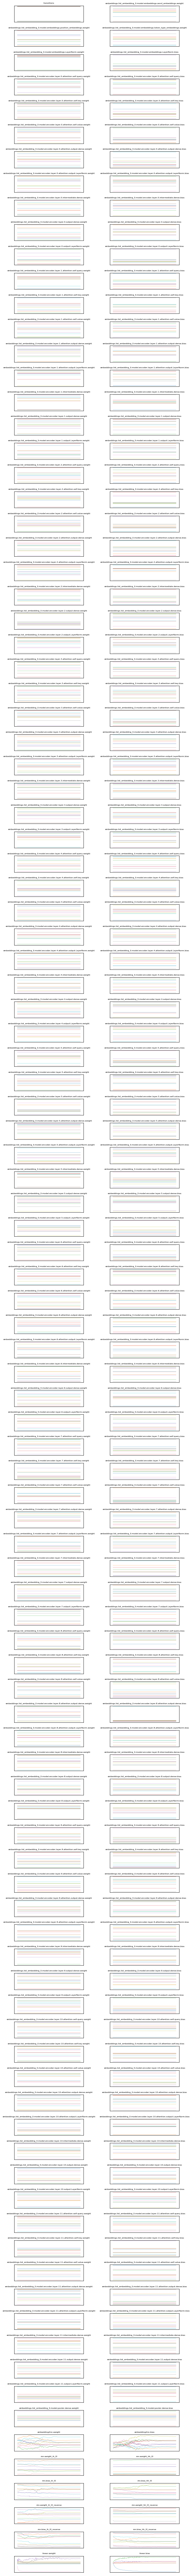

In [22]:
# 8. plot weight traces (optional)
plotter = Plotter()
plotter.plot_weights('resources/taggers/key_phrase_bert/weights.txt')

In [23]:
# 9. find learning rate
learning_rate_tsv = trainer.find_learning_rate('resources/taggers/key_phrase_bert',
                                                    'learning_rate.tsv')

[1.4454397707459274e-07]
[1.7378008287493754e-07]
[2.0892961308540395e-07]
[2.51188643150958e-07]
[3.019951720402016e-07]
[3.6307805477010137e-07]
[4.36515832240166e-07]
[5.248074602497725e-07]
[6.309573444801933e-07]
[7.585775750291837e-07]
[9.120108393559096e-07]
[1.096478196143185e-06]
[1.3182567385564074e-06]
[1.5848931924611132e-06]
[1.9054607179632473e-06]
[2.2908676527677735e-06]
[2.754228703338166e-06]
[3.311311214825911e-06]
[3.981071705534973e-06]
[4.7863009232263826e-06]
[5.754399373371569e-06]
[6.918309709189365e-06]
[8.317637711026708e-06]
[9.999999999999999e-06]
[1.202264434617413e-05]
[1.4454397707459279e-05]
[1.737800828749376e-05]
[2.0892961308540385e-05]
[2.5118864315095795e-05]
[3.019951720402016e-05]
[3.630780547701014e-05]
[4.365158322401661e-05]
[5.248074602497728e-05]
[6.309573444801929e-05]
[7.585775750291836e-05]
[9.120108393559096e-05]
[0.00010964781961431851]
[0.00013182567385564074]
[0.0001584893192461114]
[0.00019054607179632462]
[0.00022908676527677726]
[0

Learning_rate plots are saved in resources/taggers/key_phrase_bert/learning_rate.png


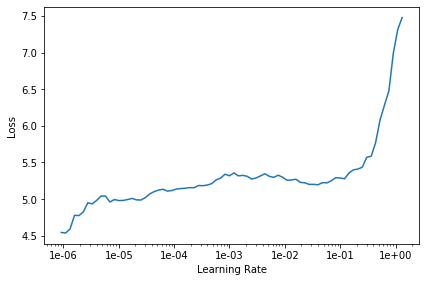

In [24]:
# plot the learning rate finder curve
plotter = Plotter()
plotter.plot_learning_rate('resources/taggers/key_phrase_bert/learning_rate.tsv')

2020-04-29 18:18:38,413 ----------------------------------------------------------------------------------------------------
2020-04-29 18:18:38,413 WARNING: No LOSS found for test split in this data.
2020-04-29 18:18:38,414 Are you sure you want to plot LOSS and not another value?
2020-04-29 18:18:38,415 ----------------------------------------------------------------------------------------------------
2020-04-29 18:18:38,435 ----------------------------------------------------------------------------------------------------
2020-04-29 18:18:38,436 WARNING: No F1 found for test split in this data.
2020-04-29 18:18:38,436 Are you sure you want to plot F1 and not another value?
2020-04-29 18:18:38,437 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in resources/taggers/key_phrase_bert/training.png


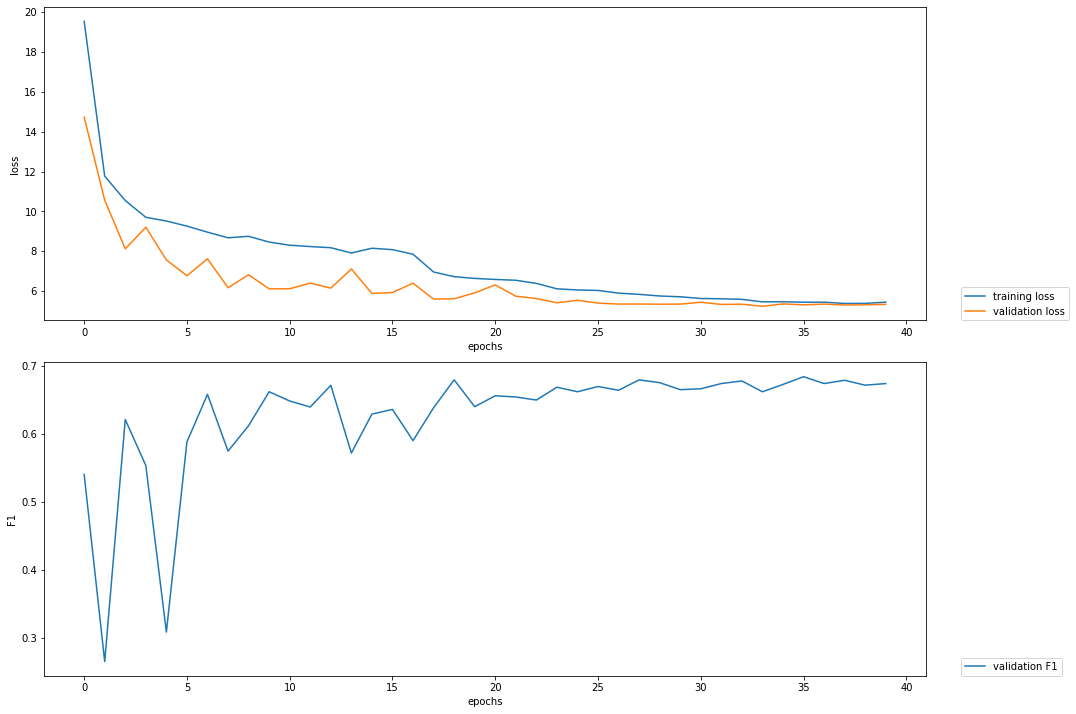

In [25]:
plotter.plot_training_curves('resources/taggers/key_phrase_bert/loss.tsv')